In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('/content/car_details.csv')
# print(df.head())

from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df1 = df.copy()

df1['transmission'] = Le.fit_transform(df1['transmission'])

df1['year'] = Le.fit_transform(df1['year'])
df1['fuel'] = Le.fit_transform(df1['fuel'])
df1['seller_type'] = Le.fit_transform(df1['seller_type'])
df1['owner'] = Le.fit_transform(df1['owner'])

df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,13,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,13,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,18,600000,100000,1,1,1,0
3,Datsun RediGO T Option,23,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,20,450000,141000,1,1,1,2


In [ ]:
df1.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Text(0.5, 1.0, ' Corelation Of Columns')

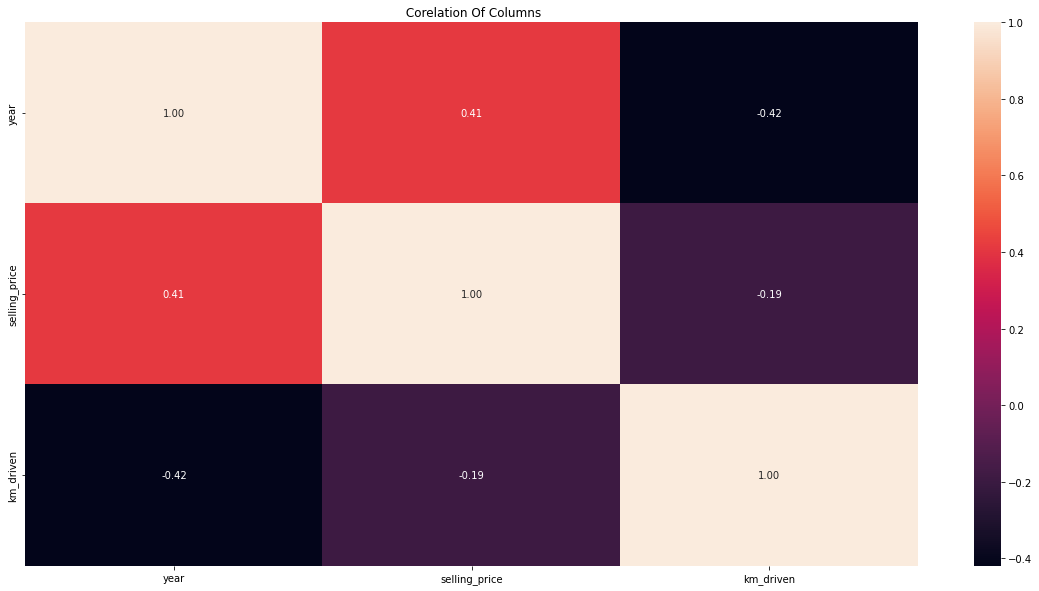

In [ ]:
plt.figure(figsize=(20,10))
corr_columns = df.corr()
sns.heatmap(corr_columns,annot=True, fmt = ".2f")
plt.title(' Corelation Of Columns')

In [ ]:
df1.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,19.091244,5.041273e+05,66215.777419,2.469124,0.794470,0.896774,0.820276
std,4.213146,5.785487e+05,46644.102194,1.508435,0.458629,0.304289,1.233494
min,0.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.087498e+05,35000.000000,1.000000,1.000000,1.000000,0.000000
50%,20.000000,3.500000e+05,60000.000000,1.000000,1.000000,1.000000,0.000000
75%,22.000000,6.000000e+05,90000.000000,4.000000,1.000000,1.000000,2.000000
max,26.000000,8.900000e+06,806599.000000,4.000000,2.000000,1.000000,4.000000


In [ ]:
#Dividing dataset into features(X) and label(y)
x = df.iloc[:100,[1,2]].values
y = df.iloc[:100, 5].values

In [ ]:
#Splitting dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=45,stratify=y)
#If we specify random state as constant integer train data will be constant For every run otherwise
#Train data will be changed for every run and accuracy will differ


In [ ]:
#Create the SVM model

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
# SVC with linear kernel

In [ ]:
C = 1.0 # SVM regularization parameter

# LinearSVC (linear kernel)
svc =SVC(kernel='linear', C=C)
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Evaluate the trainong model (Accuracy of training model)

Trainaccuracy = cross_val_score(svc,X_train,y_train,cv=5)
svc.fit(X_train,y_train)
print("Train model accuracy:", np.mean(Trainaccuracy))

Train model accuracy: 0.7142857142857143


In [ ]:
# Evaluate the Testing accuracy
y_pred1 = svc.predict(X_test)
print ("Accuracy of linear svm:", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

Accuracy of linear svm: 0.7333333333333333
[[ 6  5]
 [ 3 16]]


In [ ]:
# SVC with RBF kernel
# Gamma indicates the ‘spread’ of the kernel that is decision region.
#Gamma is low, the decision region is very broad.
#When gamma is high, the ‘decision boundary is high, which creates islands of decision-boundaries around data points

rbf_svc =SVC(kernel='rbf', gamma=0.8, C=C)
rbf_svc.fit(X_train, y_train)
y_pred2 = rbf_svc.predict(X_test)
print ("Accuracy of rbf kernel:", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

Accuracy of rbf kernel: 0.6
[[ 0 11]
 [ 1 18]]


In [ ]:
# SVC with polynomial (degree 3) kernel
poly_svc =SVC(kernel='poly', degree=5, C=C)
poly_svc.fit(x, y)
y_pred3 = poly_svc.predict(X_test)
print ("Accuracy of polynomial kernel:", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

Accuracy of polynomial kernel: 0.7666666666666667
[[ 4  7]
 [ 0 19]]


In [ ]:
grid = {

'C':[0.01,0.1,1,10],
'kernel' : ["linear","poly","rbf"],
'degree' : [1,3,5,7],
'gamma' : [0.01,1]
}

In [ ]:
svm =SVC()
svm_cv = GridSearchCV(svm, grid)
svm_cv.fit(X_train,y_train)

In [ ]:
print("Best Parameters:",svm_cv.best_params_)

#print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))